# <center>Actividad 4 - Interpretabilidad de algoritmos</center>

En esta actividad se pide realizar un análisis exploratorio de datos sobre un tema escogido, para luego a través de diferentes algoritmos predecir las hipótesis planteadas. Para a continuación llevar a cabo la interpretación de los algoritmos utilizados, para mostrar cuáles son los mejores y así extraer información comprensible para el ser humano.

## <center><u>EXOPLANETAS</u></center>

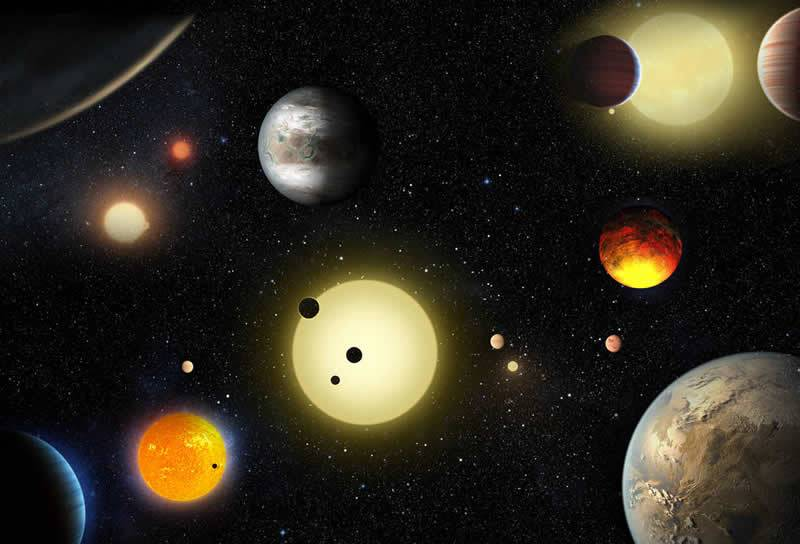

Estudiantes: Rubén Martínez Gormaz | Samuel Fernando Méndez | Ruoyan Zhang | Lian Salmerón López <br> <b>Grupo 6</b>

## <center>Contexto</center>

Todos los planetas de nuestro sistema solar orbitan alrededor del Sol, los planetas que orbitan alrededor de otras estrellas se llaman exoplanetas.<br> 
Los exoplanetas son muy difíciles de ver directamente con telescopios, están ocultos por el resplandor brillante de las estrellas que alrededor de las que orbitan.<br> <p>
	En la actualidad, se ha confirmado la existencia de casi cuatro mil exoplanetas. <br>
	Algunos son masivos, como Júpiter, pero giran alrededor de su estrella progenitora mucho más cerca de lo que Mercurio orbita el Sol. <br>
    Otros son rocosos o helados, 
	y muchos simplemente no tienen nada parecido en el Sistema Solar.<p> 
	Hay sistemas que albergan más de un planeta, planetas que orbitan dos estrellas a la vez, 
	e incluso un puñado de planetas que podrían presentar las condiciones adecuadas para que su superficie tenga agua de forma estable, uno de los elementos necesarios para la vida tal y como la conocemos. <br>

## <center>Planteamiento</center>

En este analisis se estudiará el comportamiento de los exoplanetas a traves de los datos obtenidos del datasheet, los cuales haremos un tratamiento previo de ellos, aplicando los filtros necesarios para obtener unos datos más limpios con los que se 
procederá a sacar obtener algunas gráficas representativas a continuación se procederá a aplicar los modelos y finalmete se realiazá la predicción de los resultados obtenidos de los modelos, según el criterio obtenidos tras el estudio.


## <center>Instalaciones de liberías</center>

A continuación se van a mostrar las librerías que se han utilizado para este proyecto junto con una breve descripción de lo que ofrecen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import seaborn as sns
import sklearn
import astropy.units as u
import astropy.units.astrophys as ua
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [2]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np
from sklearn import preprocessing

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Modelos
from xgboost import XGBClassifier, plot_importance

import astropy.units as u
import astropy.units.astrophys as ua

from sklearn.preprocessing import MinMaxScaler
########################################################
### Para un flujo de trabajo más rápido, las bibliotecas de Interpretabilidad
### se instalarán/cargarán sobre la marcha del tutorial
########################################################

### Add-ons adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
### Modelos
from xgboost import XGBClassifier, plot_importance
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Módulos sklearn para métricas de rendimiento
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Módulos sklearn para selección de modelo de ML
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



from sklearn.metrics import mean_squared_error


## <center>Carga de datos</center>

In [4]:
# Cargamos el txt, señalando que el separador son ","
df_exoplanetas = pd.read_csv(r"exoplanetas.txt", sep=",")

In [5]:
# Mostramos la tabla
df_exoplanetas.head()

name  binaryflag    mass  radius     period  semimajoraxis  \
0   KOI-1843.03           0  0.0014   0.054   0.176891         0.0048   
1  Kepler-974 b           0     NaN   0.140   4.194497         0.0390   
2   KOI-1843.02           0     NaN   0.071   6.356006         0.0520   
3    Kepler-9 b           0  0.2500   0.840  19.224180         0.1430   
4    Kepler-9 c           0  0.1700   0.820  39.031060         0.2290   

   eccentricity  periastron  longitude  ascendingnode  ...  lastupdate  \
0           NaN         NaN        NaN            NaN  ...    13/07/15   
1           NaN         NaN        NaN            NaN  ...    17/11/28   
2           NaN         NaN        NaN            NaN  ...         NaN   
3        0.0626         NaN        NaN            NaN  ...    15/12/03   
4        0.0684         NaN        NaN            NaN  ...    15/12/03   

   system_rightascension  system_declination system_distance  hoststar_mass  \
0          19 00 03.1450      +40 13 14.7985         134.833           0.52   
1          19 00 03.1450      +40 13 14.7985         134.833           0.52   
2          19 00 03.1450      +40 13 14.7985         134.833           0.52   
3          19 02 17.7544      +38 24 03.1772         650.000           1.07   
4          19 02 17.7544      +38 24 03.1772         650.000           1.07   

  hoststar_radius hoststar_metallicity hoststar_temperature  hoststar_age  \
0            0.50                 0.07               3687.0           NaN   
1            0.50                 0.07               3687.0           NaN   
2            0.50                 0.07               3687.0           NaN   
3            1.02                 0.12               5777.0           NaN   
4            1.02                 0.12               5777.0           NaN   

                list  
0      Controversial  
1  Confirmed planets  
2      Controversial  
3  Confirmed planets  
4  Confirmed planets  

[5 rows x 25 columns]

In [6]:
df_exoplanetas.shape

(5140, 25)

El conjunto de datos cuenta con 5140 filas (planetas) y 25 columnas (características).

In [7]:
# Mostramos las columnas que componen el datasheet
df_exoplanetas.columns

Index(['name', 'binaryflag', 'mass', 'radius', 'period', 'semimajoraxis',
       'eccentricity', 'periastron', 'longitude', 'ascendingnode',
       'inclination', 'temperature', 'age', 'discoverymethod', 'discoveryyear',
       'lastupdate', 'system_rightascension', 'system_declination',
       'system_distance', 'hoststar_mass', 'hoststar_radius',
       'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age', 'list'],
      dtype='object')

### <u>Datos</u>

<ul>
    <li>name: Identificador principal del planeta.</li>
    <li>binaryflag: Bandera binaria que guarda:
        <ul>
            <li>0 - No se conoce compañera binaria estelar.</li>
            <li>1 - Binario de tipo P (circumbinario) que orbita dos estrellas.</li>
            <li>2 - Binario de tipo S, (no circumbinario).</li>
            <li>3 - Planeta huérfano, no tiene estrella.</li>
        </ul>
    </li>
    <li>mass: Masa del planeta en comparación con la masa de Júpiter.</li>
    <li>radius: Radio físico del planeta en comparación con el radio de Júpiter.</li>
    <li>period: Número de días que necesita el planeta para rodear a la estrella anfitriona.</li>
    <li>semimajoraxis: Distancia a la estrella anfitriona.</li>
    <li>eccentricity: Excentricidad, es un número que mide como son las órbitas elípticas, cuanto mayor sea el valor, más estirada es la órbita: 
        <ul>
            <li>=0: la órbita es un círculo.</li>
            <li>>0: la órbita es una elipse.</li>
        </ul>
    </li>
    <li>periastron: periastron, punto en una órbita elíptica que se acerca más al centro de la estrella (grados).</li>
    <li>longitude: Longitud (grados).</li>
    <li>ascendingnode: Nodo ascendente, es el punto donde el objeto cruza el plano de referencia moviéndose desde el hemisferio sur al hemisferio norte celeste. (grados).</li>
    <li>inclination: Inclinación, ángulo que forma el plano de la órbita (plano orbital) del planeta con respecto a un plano de referencia (grados).</li>
    <li>temperature: Temperatura de la superficie del planeta asumiendo que el planeta no tiene atmósfera (Kelvin).</li>
    <li>age: Años del planeta en billones de años (Gyr - 10^9).</li>
    <li>discoverymethod: Método por el que fue descubierto.</li>
    <li>discoveryyear: Año en el que fue descubierto [yyyy].</li>
    <li>lastupdate: Última actualización del planeta [yy/mm/dd].</li>
    <li>system_rightascension: Es una coordenada celeste que toma el lugar de la longitud (hh/mm/ss).</li>
    <li>system_declination: La coordenada celeste que toma el lugar de la latitud (+/-dd/mm/ss).</li>
    <li>system_distance: Distancia de la estrella anfitriona al Sol (parsecs).</li>
    <li>hoststar_mass: Masa de la estrella anfitriona en comparación con la masa del Sol.</li>
    <li>hoststar_radius: Radio físico de la estrella anfitriona en comparación con el radio del Sol.</li>
    <li>hoststar_metallicity: Metalicidad estelar relativa al Sol (describe la abundancia relativa de elementos más pesados que el helio en una estrella) (logaritmo relativo a la energía solar).</li>
    <li>hoststar_temperature: Temperatura de la estrella (Kelvin).</li>
    <li>hoststar_age: Edad de la estrella anfitriona (Gyr).</li>
    <li>list: Una lista de listas en las que se encuentra el planeta.</li>
</ul>

In [8]:
# Se sacan la informacion que se guarda en la columna lista
lista_planeta = list(set([planeta for lista_planeta in df_exoplanetas["list"].str.split(",") for planeta in lista_planeta]))
lista_planeta

['Retracted planet candidate',
 'Kepler Objects of Interest',
 'Solar System',
 'Confirmed planets',
 ' S-type',
 ' Planets in open clusters',
 'Planets in binary systems',
 ' Planets in globular clusters',
 'Controversial',
 ' P-type',
 ' Planets in binary systems',
 ' Orphan planets',
 ' Confirmed planets']

### <u>Visión general de los datos</u>

In [9]:
# Se desglosan las columnas por su tipo (es decir, int64, float64, object)
df_exoplanetas.columns.to_series().groupby(df_exoplanetas.dtypes).groups

{int64: ['binaryflag'], float64: ['mass', 'radius', 'period', 'semimajoraxis', 'eccentricity', 'periastron', 'longitude', 'ascendingnode', 'inclination', 'temperature', 'age', 'discoveryyear', 'system_distance', 'hoststar_mass', 'hoststar_radius', 'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age'], object: ['name', 'discoverymethod', 'lastupdate', 'system_rightascension', 'system_declination', 'list']}

In [10]:
# Se van a cambiar las columnas que se encuentran bajo el grupo object a un tipo especifico
df_exoplanetas['name'] = df_exoplanetas['name'].astype('string')
df_exoplanetas['discoverymethod'] = df_exoplanetas['discoverymethod'].astype('string')
df_exoplanetas['lastupdate'] = df_exoplanetas['lastupdate'].astype('datetime64[ns]')

In [11]:
df_exoplanetas.dtypes

name                             string
binaryflag                        int64
mass                            float64
radius                          float64
period                          float64
semimajoraxis                   float64
eccentricity                    float64
periastron                      float64
longitude                       float64
ascendingnode                   float64
inclination                     float64
temperature                     float64
age                             float64
discoverymethod                  string
discoveryyear                   float64
lastupdate               datetime64[ns]
system_rightascension            object
system_declination               object
system_distance                 float64
hoststar_mass                   float64
hoststar_radius                 float64
hoststar_metallicity            float64
hoststar_temperature            float64
hoststar_age                    float64
list                             object


In [12]:
df_exoplanetas.describe()

binaryflag         mass       radius        period  semimajoraxis  \
count  5140.000000  2507.000000  3892.000000  4.870000e+03    2571.000000   
mean      0.085603     2.311450     0.401121  2.205610e+03       7.961922   
std       0.399049     7.211644     0.441936  1.153885e+05     160.042229   
min       0.000000     0.000008     0.002300  6.511500e-02       0.004420   
25%       0.000000     0.031200     0.144800  4.454957e+00       0.050805   
50%       0.000000     0.530000     0.215990  1.187052e+01       0.118000   
75%       0.000000     2.100000     0.360910  4.260494e+01       1.038800   
max       3.000000   263.000000     6.000000  8.040000e+06    6471.000000   

       eccentricity  periastron   longitude  ascendingnode  inclination  \
count   1988.000000  913.000000   43.000000      52.000000  1515.000000   
mean       0.288289  134.905159  154.805248      84.378767    85.183028   
std        6.279254  119.492600  131.029965      86.637460    17.387620   
min       -0.129287 -233.000000 -174.640000      -5.112604    -0.000543   
25%        0.000000   47.720000   42.500000       1.928500    86.000000   
50%        0.080000  123.600000  181.979708      63.285000    88.260000   
75%        0.210000  225.000000  257.600000     150.000000    89.300000   
max      280.000000  791.000000  339.300000     320.800000   305.000000   

       temperature       age  discoveryyear  system_distance  hoststar_mass  \
count  1449.000000  4.000000    5131.000000      4916.000000    4848.000000   
mean    931.301704  0.831375    2015.186124       676.823317       0.946093   
std     621.317969  1.447952       5.962018      1070.087855       0.360209   
min     102.200000  0.005500    1781.000000         1.295000       0.010000   
25%     484.100000  0.091375    2014.000000       110.000000       0.790000   
50%     828.000000  0.160000    2016.000000       410.000000       0.950000   
75%    1276.000000  0.900000    2018.000000       859.567750       1.090000   
max    7112.000000  3.000000    2022.000000      8500.000000       9.100000   

       hoststar_radius  hoststar_metallicity  hoststar_temperature  \
count      4546.000000           3609.000000           4596.000000   
mean          1.468447              0.012517           5406.856440   
std           3.235283              0.197599           1199.891602   
min           0.000014             -2.090000             58.370000   
25%           0.780000             -0.070000           4975.000000   
50%           0.960000              0.020000           5576.500000   
75%           1.240000              0.120000           5922.000000   
max          83.800000              0.560000          29300.000000   

       hoststar_age  
count    595.000000  
mean       4.692809  
std        4.525448  
min        0.002000  
25%        2.000000  
50%        4.040000  
75%        6.600000  
max       80.000000

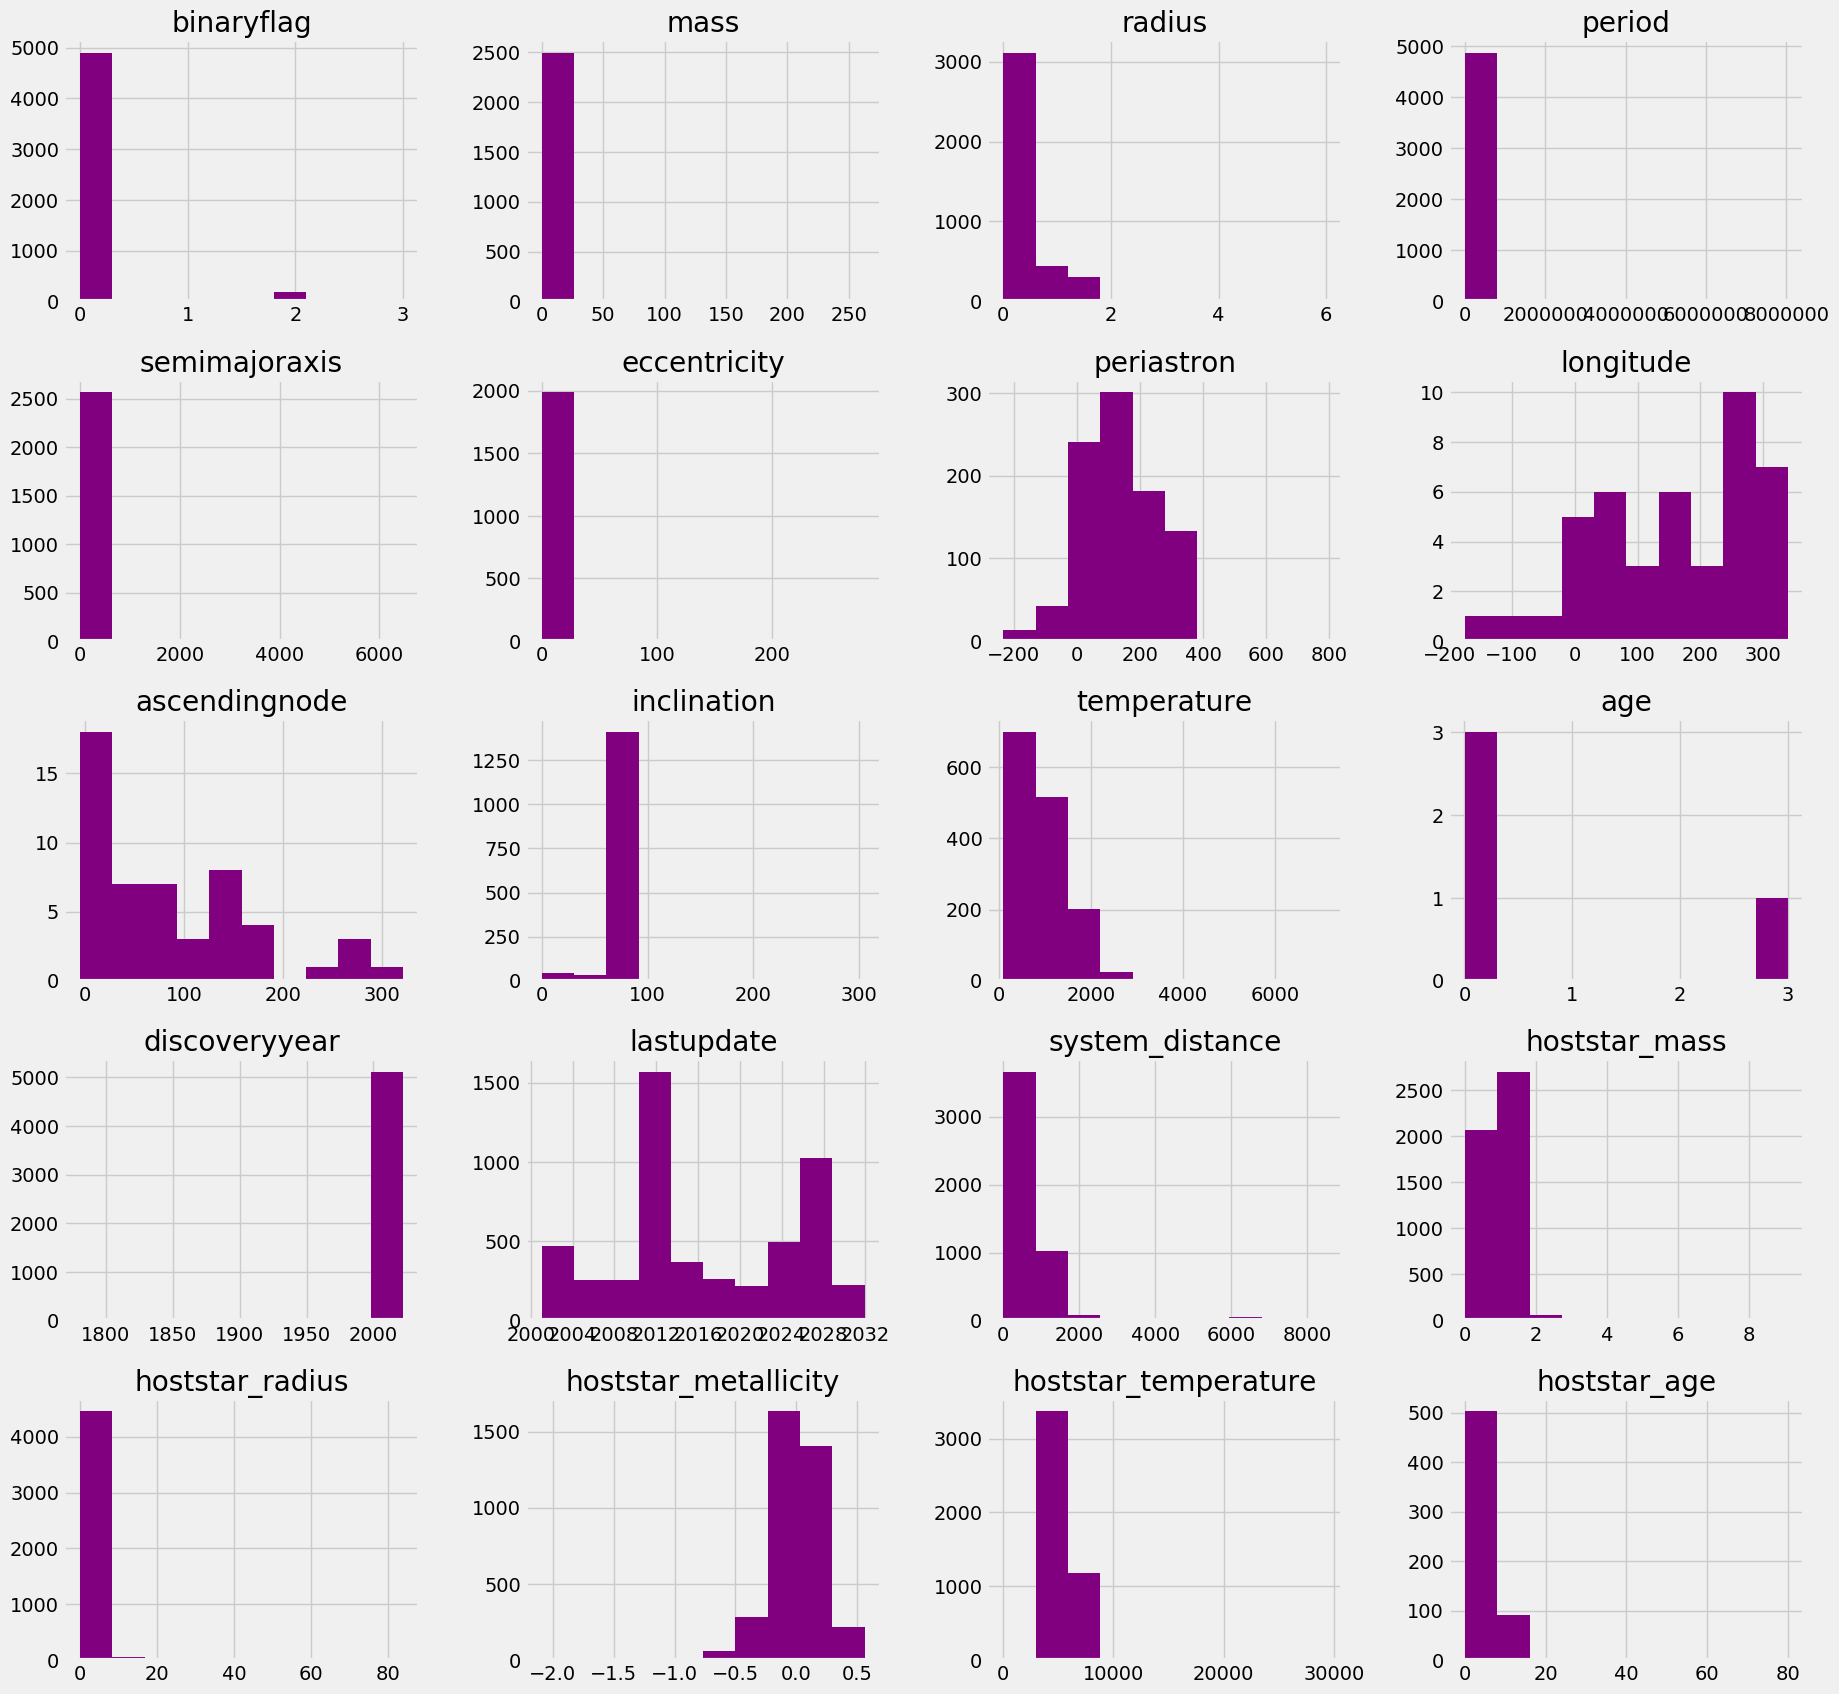

In [13]:
df_exoplanetas.hist(figsize=(20,20), color = "purple")
plt.show()

> Podemos observar lo siguiente de las gráficas obtenidas:
- De la mayoría de los planetas no se conoce compañera binaria estelar, es decir no tienen otra estrella que orbita alrededor de una masa común.
- Casi todos los planetas, su masas se encuentran cerca de la de Júpiter, al igual que el radio.
- El período o tiempo que tardan en realizar una vuelta completa a su estrella anfitriona, no alcanza el 2, pero hay que tener en cuenta que eje x se encuentra en base a 1e6, lo que corresponde al valor de 403 días.
- La temperatura de los diferentes planetas oscila desde un mínimo de 102.2 K (-170,95 C) a un máximo de 7112 K (6838,85 C).
- Los años en los que se descubrieron la mayoría de los planetas es a partir de los 2000s, esto puede deberse a la mejoría de las tecnologías e implementación de nuevos métodos.
- La tabla de la última actualización parece contener datos de hasta el 2032, por lo que puede que se llegen a descartar a la hora de filtrar los datos.
- Las estadísticas para la estrella anfitriona de cada planeta no se desvía demasiado de las características que guarda nuestra estrella el Sol.
<br><br>
- Se puede observar que en varias gráficas como la masa, radio, temperatura del planeta entre otros, tienen valores 0 o vacíos en sus datos. Es cierto que hay algunas columnas cuyos datos pueden llegar a ser 0 como, binaryflag y eccentricity.

### <u>Correlación entre los datos</u>

Para conocer que tipo de relación guardan el tipo de datos entre sí, se sacará un mapa de calor en que se puede observar cuánto de correspondencia mantienen.

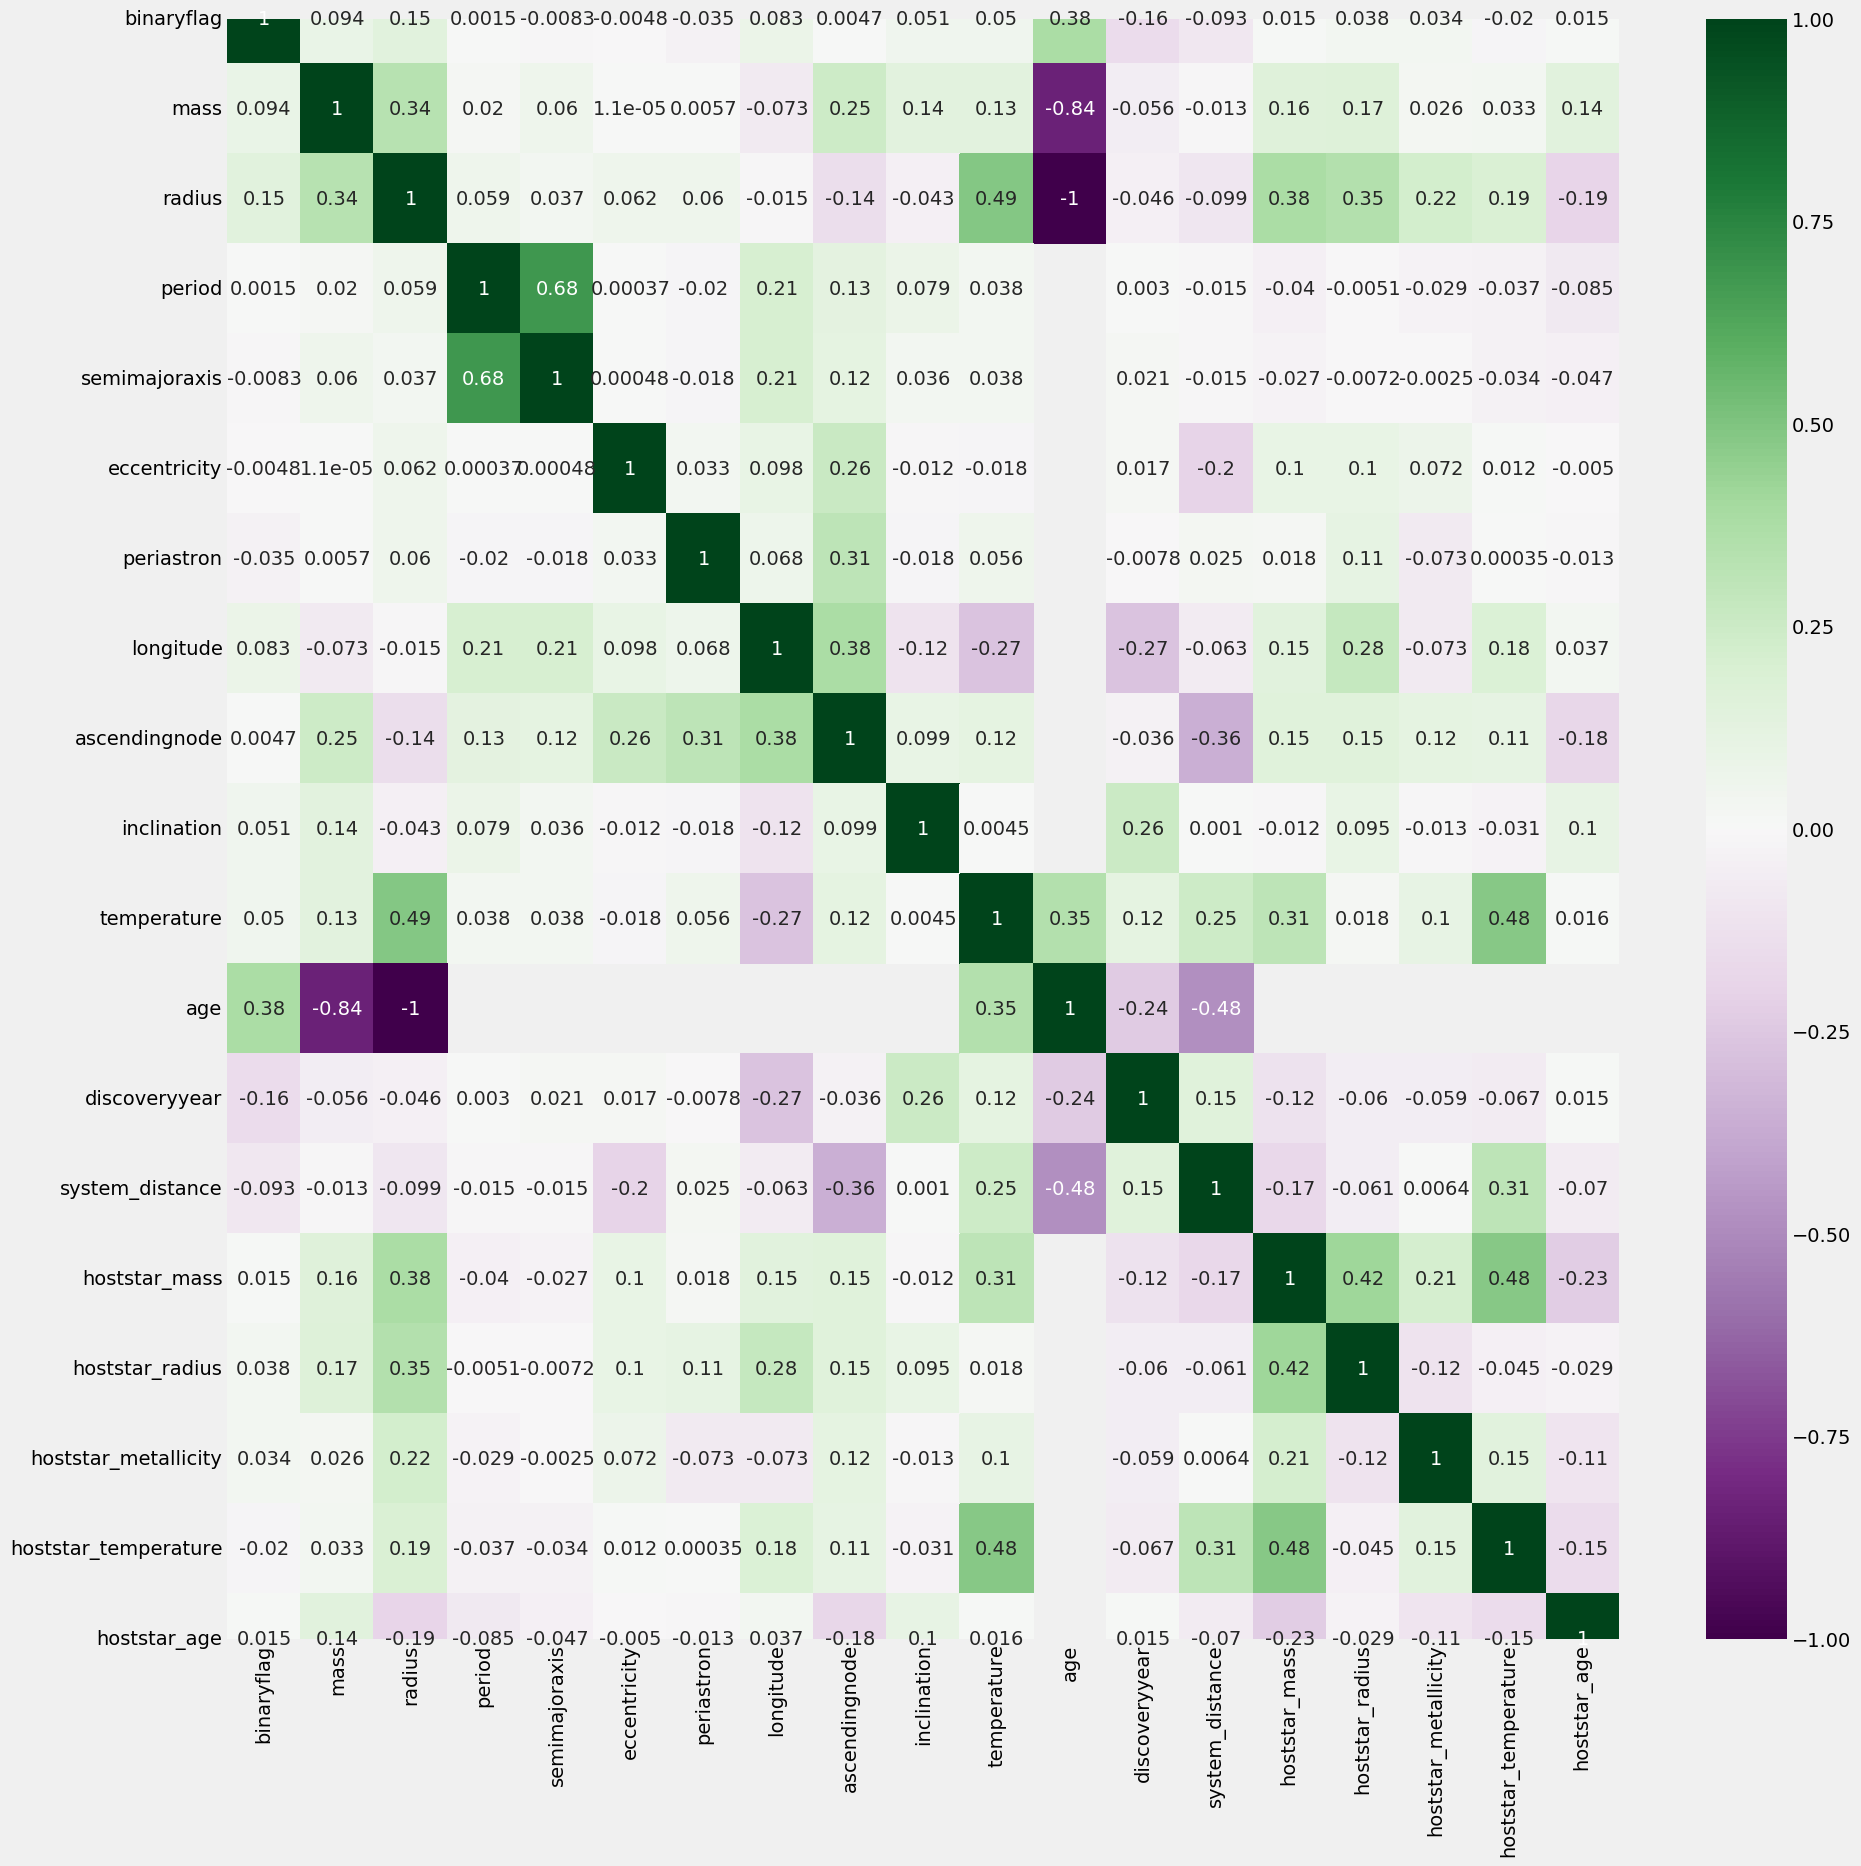

In [14]:
corr_ = df_exoplanetas.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(corr_, annot=True, cmap='PRGn')

plt.show()

> A través de este diagrama se pueden apreciar algunas correlaciones:
- La masa, el radio y la temperatura de las estrellas están altamente correlacionados.
- Las masas y los radios de los planetas, así como los radios y la temperatura de la superficie, también están correlacionados, pero las masas y la temperatura no lo están.
- Existe una correlación casi perfecta entre la distancia entre el planeta y la estrella anfitriona (semimajoraxis) con la duración del período orbital (period). 
- El radio y la masa de un planeta no tienen relación con el período. Entonces, resulta que la velocidad de un planeta no se ve afectada por su tamaño.
- hoststar_metallicity no tiene altas correlaciones con otras variables.
- La excentricidad tiene relaciones bajas con period , semimajoraxis y hoststar_temperature.

### <u>Número de descubrimientos por año</u>

In [15]:
# Se crea un dataframe con las columnas que nos interesan
exoplanetas_descubiertos = df_exoplanetas[['name' , 'discoveryyear','discoverymethod']]

In [16]:
# Eliminar planetas no descubiertos (eliminar filas)
exoplanetas_descubiertos = exoplanetas_descubiertos[exoplanetas_descubiertos['discoverymethod'].notna()]

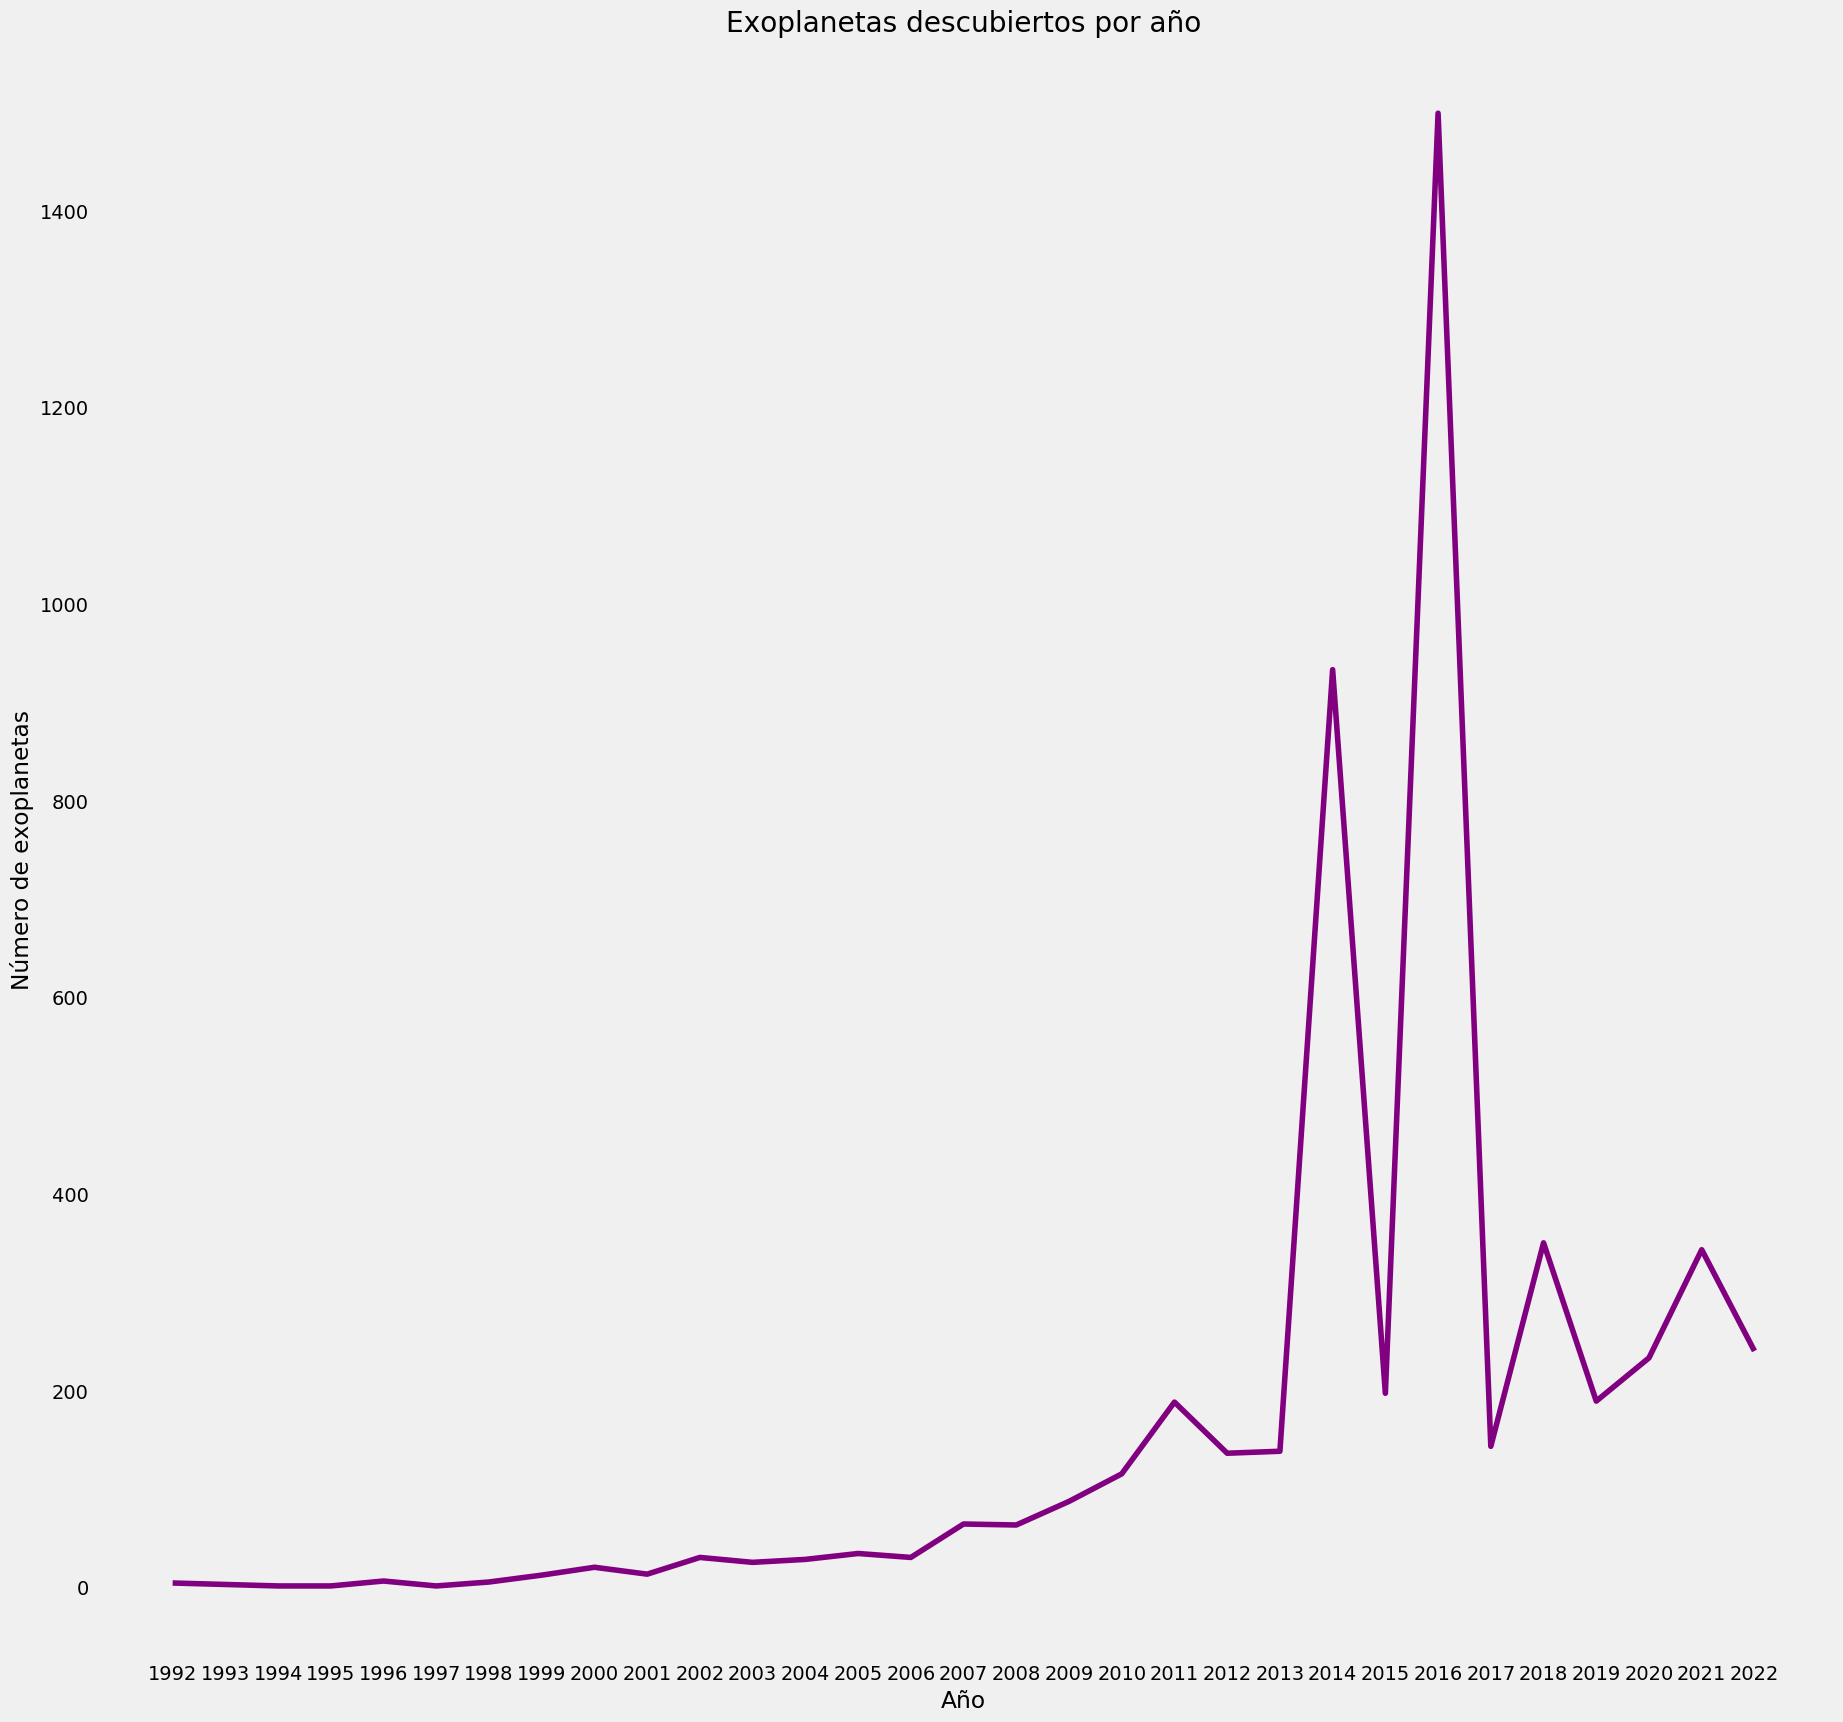

In [17]:
# Gráfica planetas descubiertos por año
planeta_por_anio= exoplanetas_descubiertos['discoveryyear'].groupby([exoplanetas_descubiertos['discoveryyear']]).count()
y = planeta_por_anio
x = planeta_por_anio.index
figure(figsize=(20, 20))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.grid()
plt.xlabel("Año")
plt.ylabel("Número de exoplanetas")
plt.title("Exoplanetas descubiertos por año")
xlabels = planeta_por_anio.index
plt.plot(x, y, color="purple")

De esta gráfica podemos observar que el peor año de descubrimientos fue en el 2015, a comparación de su año anterior, el cúal registró un buen número de exoplanetas. Por otro lado el 2016, resultó ser el mejor, con el mayor número descubrimientos.

### <u>Métodos de descubrimiento</u>

In [18]:
metodo_descubrimiento = exoplanetas_descubiertos.groupby(['discoveryyear', 'discoverymethod'])[['discoverymethod']].agg(['count'])

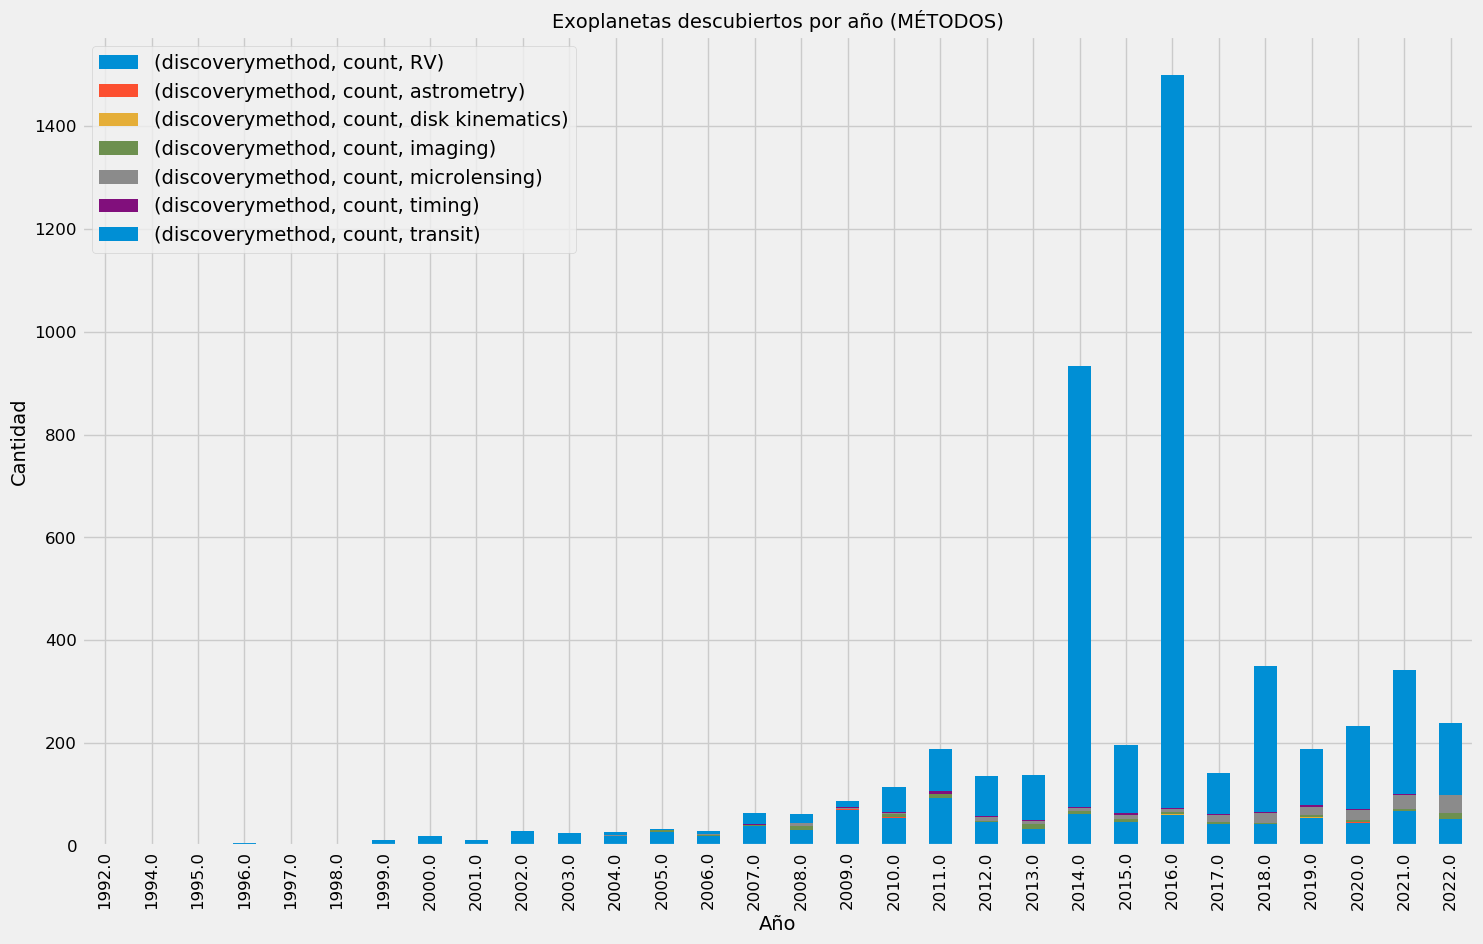

In [19]:
metodo_descubrimiento.unstack().plot(kind='bar',
                                     stacked='False',
                                     figsize=(16, 10),
                                    fontsize=12,
                                    label='test')
plt.xlabel('Año',fontsize=14)
plt.ylabel('Cantidad',fontsize=14)
plt.title('Exoplanetas descubiertos por año (MÉTODOS)',fontsize=14)
plt.legend(loc='upper left', prop={'size': 14})

De la siguiente gráfica nos fijamos de que el método que más se ha utilizado y con el que se han descubierto un mayor número de exoplanetas es "<i>transit</i>". Este método se produce cuando el planeta se mueve entre nosotros y la estrella que está orbitando, entonces, el planeta bloquea algo de la luz de la estrella y disminuye la cantidad de luz de la misma.
<br>
Mientras que el menos resulta ser el método "<i>disk kinematics</i>". Es la medición de la cinemática o los movimientos de las estrellas a través del espacio

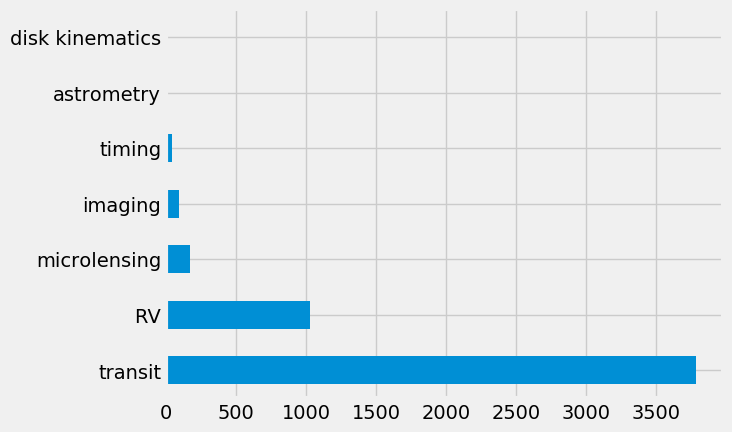

In [20]:
df_exoplanetas['discoverymethod'].value_counts()[:20].plot(kind='barh')

De la siguiente gráfica nos fijamos de que el método que más se ha utilizado y con el que se han descubierto un mayor número de exoplanetas es "<i>transit</i>". Este método se produce cuando el planeta se mueve entre nosotros y la estrella que está orbitando, entonces, el planeta bloquea algo de la luz de la estrella y disminuye la cantidad de luz de la misma.
<br>
Mientras que el menos resulta ser el método "<i>disk kinematics</i>". Es la medición de la cinemática o los movimientos de las estrellas a través del espacio

# Interpretabilidad y ML

In [21]:
df_exoplanets_filtro = pd.read_csv(r"exoplanetas.txt", sep=",")

In [22]:
df_exoplanets_filtro.isna().sum()

name                        1
binaryflag                  0
mass                     2633
radius                   1248
period                    270
semimajoraxis            2569
eccentricity             3152
periastron               4227
longitude                5097
ascendingnode            5088
inclination              3625
temperature              3691
age                      5136
discoverymethod            10
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
system_distance           224
hoststar_mass             292
hoststar_radius           594
hoststar_metallicity     1531
hoststar_temperature      544
hoststar_age             4545
list                        0
dtype: int64

In [23]:
#Colocamos el nombre como primera columna
df_exoplanets_filtro = df_exoplanets_filtro.set_index('name', drop=True)

In [24]:
df_exoplanets_filtro

binaryflag    mass  radius       period  semimajoraxis  \
name                                                                    
KOI-1843.03             0  0.0014   0.054     0.176891         0.0048   
Kepler-974 b            0     NaN   0.140     4.194497         0.0390   
KOI-1843.02             0     NaN   0.071     6.356006         0.0520   
Kepler-9 b              0  0.2500   0.840    19.224180         0.1430   
Kepler-9 c              0  0.1700   0.820    39.031060         0.2290   
...                   ...     ...     ...          ...            ...   
eta Cet b               0  2.4600     NaN   407.300000         1.2700   
eta Cet c               0  3.1600     NaN   744.300000         1.9300   
HD 108874 b             0  1.3600     NaN   395.400000         1.0510   
HD 108874 c             0  1.0180     NaN  1605.800000         2.6800   
Kepler-1473 b           0     NaN   0.106    14.427355            NaN   

               eccentricity  periastron  longitude  ascendingnode  \
name                                                                
KOI-1843.03             NaN         NaN        NaN            NaN   
Kepler-974 b            NaN         NaN        NaN            NaN   
KOI-1843.02             NaN         NaN        NaN            NaN   
Kepler-9 b           0.0626         NaN        NaN            NaN   
Kepler-9 c           0.0684         NaN        NaN            NaN   
...                     ...         ...        ...            ...   
eta Cet b            0.1700      247.20        NaN            NaN   
eta Cet c            0.0200       36.67        NaN            NaN   
HD 108874 b          0.0700         NaN        NaN            NaN   
HD 108874 c          0.2500         NaN        NaN            NaN   
Kepler-1473 b           NaN         NaN        NaN            NaN   

               inclination  ...  lastupdate  system_rightascension  \
name                        ...                                      
KOI-1843.03          72.00  ...    13/07/15          19 00 03.1450   
Kepler-974 b         89.38  ...    17/11/28          19 00 03.1450   
KOI-1843.02          88.24  ...         NaN          19 00 03.1450   
Kepler-9 b           87.10  ...    15/12/03          19 02 17.7544   
Kepler-9 c           87.20  ...    15/12/03          19 02 17.7544   
...                    ...  ...         ...                    ...   
eta Cet b            81.90  ...    15/12/11         01 08 35.39148   
eta Cet c            81.90  ...    15/12/11         01 08 35.39148   
HD 108874 b            NaN  ...    10/12/29          12 30 26.8817   
HD 108874 c            NaN  ...    10/12/29          12 30 26.8817   
Kepler-1473 b          NaN  ...    16/05/10          19 22 32.7843   

              system_declination  system_distance hoststar_mass  \
name                                                              
KOI-1843.03       +40 13 14.7985          134.833          0.52   
Kepler-974 b      +40 13 14.7985          134.833          0.52   
KOI-1843.02       +40 13 14.7985          134.833          0.52   
Kepler-9 b        +38 24 03.1772          650.000          1.07   
Kepler-9 c        +38 24 03.1772          650.000          1.07   
...                          ...              ...           ...   
eta Cet b         -10 10 56.1570           37.990          1.70   
eta Cet c         -10 10 56.1570           37.990          1.70   
HD 108874 b       +22 52 47.3806           68.500          1.00   
HD 108874 c       +22 52 47.3806           68.500          1.00   
Kepler-1473 b     +48 59 46.2496          664.761          1.09   

              hoststar_radius hoststar_metallicity  hoststar_temperature  \
name                                                                       
KOI-1843.03              0.50                 0.07                3687.0   
Kepler-974 b             0.50                 0.07                3687.0   
KOI-1843.02              0.50                 0.07                3687.0   
Kepl

In [25]:
#El objetivo será calcular el tamaño de los planetas y clasificarlos en función de ese dato
df_exoplanets_filtro['RadiusSI'] = [(x*ua.jupiterRad).to(u.m).value for x in df_exoplanets_filtro['radius']]
df_exoplanets_filtro['RadiusKm'] = df_exoplanets_filtro['RadiusSI'] * 1E-3
df_exoplanets_filtro['MassSI'] = [(x*ua.jupiterMass).to(u.kg).value for x in df_exoplanets_filtro['mass']]
df_exoplanets_filtro['VolumeSI'] = 4/3 * np.pi * df_exoplanets_filtro['RadiusSI'] ** 3

# Densidad de cada planeta
df_exoplanets_filtro['DensitySI'] = df_exoplanets_filtro['MassSI'] / df_exoplanets_filtro['VolumeSI']

In [26]:
#Densidad de la tierra
earth_density = float(df_exoplanets_filtro.loc['Earth', 'DensitySI'])

In [27]:
newdf = df_exoplanets_filtro[["RadiusSI", "MassSI", "DensitySI",'mass','radius','eccentricity','period','hoststar_temperature','system_distance', 'hoststar_mass', 'hoststar_radius']]

In [28]:
#Tranformamos los datos vacíos por la media aritmética
columns=['mass','radius','eccentricity','period','hoststar_temperature','system_distance', 'hoststar_mass', 'hoststar_radius']
for col in columns:
    newdf[ col ] = newdf[ col ].replace( to_replace=np.nan, value=np.mean(newdf [col] ))

print(newdf)
#Creamos nuestra variable X quitando las columnas calculadas anteriormente de densidad, masa y radio
cols = newdf[newdf.columns[3:]]

                 RadiusSI        MassSI     DensitySI     mass    radius  \
name                                                                       
KOI-1843.03     3860568.0  2.657374e+24  11025.810499  0.00140  0.054000   
Kepler-974 b   10008880.0           NaN           NaN  2.31145  0.140000   
KOI-1843.02     5075932.0           NaN           NaN  2.31145  0.071000   
Kepler-9 b     60053280.0  4.745311e+26    523.077354  0.25000  0.840000   
Kepler-9 c     58623440.0  3.226812e+26    382.358837  0.17000  0.820000   
...                   ...           ...           ...      ...       ...   
eta Cet b             NaN  4.669387e+27           NaN  2.46000  0.401121   
eta Cet c             NaN  5.998074e+27           NaN  3.16000  0.401121   
HD 108874 b           NaN  2.581449e+27           NaN  1.36000  0.401121   
HD 108874 c           NaN  1.932291e+27           NaN  1.01800  0.401121   
Kepler-1473 b   7578152.0           NaN           NaN  2.31145  0.106000   

           

In [29]:
cols

mass    radius  eccentricity       period  \
name                                                          
KOI-1843.03    0.00140  0.054000      0.288289     0.176891   
Kepler-974 b   2.31145  0.140000      0.288289     4.194497   
KOI-1843.02    2.31145  0.071000      0.288289     6.356006   
Kepler-9 b     0.25000  0.840000      0.062600    19.224180   
Kepler-9 c     0.17000  0.820000      0.068400    39.031060   
...                ...       ...           ...          ...   
eta Cet b      2.46000  0.401121      0.170000   407.300000   
eta Cet c      3.16000  0.401121      0.020000   744.300000   
HD 108874 b    1.36000  0.401121      0.070000   395.400000   
HD 108874 c    1.01800  0.401121      0.250000  1605.800000   
Kepler-1473 b  2.31145  0.106000      0.288289    14.427355   

               hoststar_temperature  system_distance  hoststar_mass  \
name                                                                  
KOI-1843.03                  3687.0          134.833           0.52   
Kepler-974 b                 3687.0          134.833           0.52   
KOI-1843.02                  3687.0          134.833           0.52   
Kepler-9 b                   5777.0          650.000           1.07   
Kepler-9 c                   5777.0          650.000           1.07   
...                             ...              ...            ...   
eta Cet b                    4528.0           37.990           1.70   
eta Cet c                    4528.0           37.990           1.70   
HD 108874 b                  5407.0           68.500           1.00   
HD 108874 c                  5407.0           68.500           1.00   
Kepler-1473 b                6046.0          664.761           1.09   

               hoststar_radius  
name                            
KOI-1843.03               0.50  
Kepler-974 b              0.50  
KOI-1843.02               0.50  
Kepler-9 b                1.02  
Kepler-9 c                1.02  
...                        ...  
eta Cet b                14.30  
eta Cet c                14.30  
HD 108874 b               1.22  
HD 108874 c               1.22  
Kepler-1473 b             1.09  

[5140 rows x 8 columns]

In [30]:
cols.isna().sum()

mass                    0
radius                  0
eccentricity            0
period                  0
hoststar_temperature    0
system_distance         0
hoststar_mass           0
hoststar_radius         0
dtype: int64

In [31]:
#Clasificamos los planetas
filtro = newdf["DensitySI"] > float(earth_density)
newdf["DensitySI"][filtro] = "Planeta Grande"
newdf["DensitySI"][filtro == False] = "Planeta Ligero"

In [32]:
newdf["DensitySI"]

name
KOI-1843.03      Planeta Grande
Kepler-974 b     Planeta Ligero
KOI-1843.02      Planeta Ligero
Kepler-9 b       Planeta Ligero
Kepler-9 c       Planeta Ligero
                      ...      
eta Cet b        Planeta Ligero
eta Cet c        Planeta Ligero
HD 108874 b      Planeta Ligero
HD 108874 c      Planeta Ligero
Kepler-1473 b    Planeta Ligero
Name: DensitySI, Length: 5140, dtype: object

In [33]:
#Cambiamos el valor de densidad por 0 y 1 para entrenar el modelo
newdf["DensitySI"] = newdf["DensitySI"].replace(['Planeta Grande', 'Planeta Ligero'], [0,1])

La gran mayoría de los planetas son ligeros.

## conjuntos de entrenamiento y test

In [34]:
X = cols
y = newdf["DensitySI"]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

#Escalamos los datos y ajustamos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#Funcion para evaluar los algoritmos
def evaluation_scores(test, prediction, target_names=None):
    print('Precisión:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('Informe de clasificación:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
#    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))    
    print('-'*60)
    print('Matriz de confusión:\n')
    print(cm) 
    
    rmse = mean_squared_error(
            y_true  = test,
            y_pred  = prediction,
            squared = False
        )
    print(f"El error (rmse) de test es: {rmse}")

## Análisis de precisión de cada algoritmo

In [36]:
# selección de algoritmos a tener en cuenta y establecimiento de medidas de rendimiento
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XGboost', XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)))

In [37]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
6                   XGboost         98.13         2.89          99.04   
1             Random Forest         97.35         3.58          98.08   
4  Decision Tree Classifier         90.51         4.36          98.55   
3                       KNN         85.42         8.21          97.04   
2                       SVM         69.47         6.38          96.01   
0       Logistic Regression         68.35         4.66          56.19   
5               Gaussian NB         63.13         6.37          27.93   

   Accuracy STD  
6          0.52  
1          0.67  
4          0.49  
3          0.40  
2          0.58  
0          2.61  
5         29.50

## Random Forest

In [38]:
clf = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
clf.fit(X, y)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

array([0.31647947, 0.22325056, 0.05860586, 0.11753207, 0.06703887,
       0.09002209, 0.05592476, 0.07114632])

In [39]:
clf.score(X, y)

1.0

In [40]:
np.mean(y_test == Y_pred_test)

0.3642023346303502

In [41]:
evaluation_scores(y_test, Y_pred_test, target_names=['Planeta Grande', 'Planeta Ligero'])

Precisión: 0.3642
------------------------------------------------------------
Informe de clasificación:

                 precision    recall  f1-score   support

Planeta Grande       0.00      0.06      0.01        51
Planeta Ligero       0.91      0.38      0.53      1234

      accuracy                           0.36      1285
     macro avg       0.46      0.22      0.27      1285
  weighted avg       0.87      0.36      0.51      1285

------------------------------------------------------------
Matriz de confusión:

[[  3  48]
 [769 465]]
El error (rmse) de test es: 0.7973692152131594


## XGboost

In [42]:
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=33,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
xgb_predictions = xgb.predict(X_test)

In [44]:
evaluation_scores(y_test, xgb_predictions, target_names=['Planeta Grande', 'Planeta Ligero'])

Precisión: 0.9899
------------------------------------------------------------
Informe de clasificación:

                 precision    recall  f1-score   support

Planeta Grande       0.88      0.86      0.87        51
Planeta Ligero       0.99      1.00      0.99      1234

      accuracy                           0.99      1285
     macro avg       0.94      0.93      0.93      1285
  weighted avg       0.99      0.99      0.99      1285

------------------------------------------------------------
Matriz de confusión:

[[  44    7]
 [   6 1228]]
El error (rmse) de test es: 0.10058196417603768


# KNN

In [45]:
n_neighbors=3
modelo = KNeighborsClassifier(n_neighbors)

In [46]:
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X = X_test)

print('Accuracy on training set: {:.2f}'
    .format(modelo.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'
    .format(modelo.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.97


In [47]:
evaluation_scores(y_test, predicciones, target_names=['Planeta Grande', 'Planeta Ligero'])

Precisión: 0.972
------------------------------------------------------------
Informe de clasificación:

                 precision    recall  f1-score   support

Planeta Grande       0.74      0.45      0.56        51
Planeta Ligero       0.98      0.99      0.99      1234

      accuracy                           0.97      1285
     macro avg       0.86      0.72      0.77      1285
  weighted avg       0.97      0.97      0.97      1285

------------------------------------------------------------
Matriz de confusión:

[[  23   28]
 [   8 1226]]
El error (rmse) de test es: 0.1673785057955012


## Clasificación: ROC y AUC

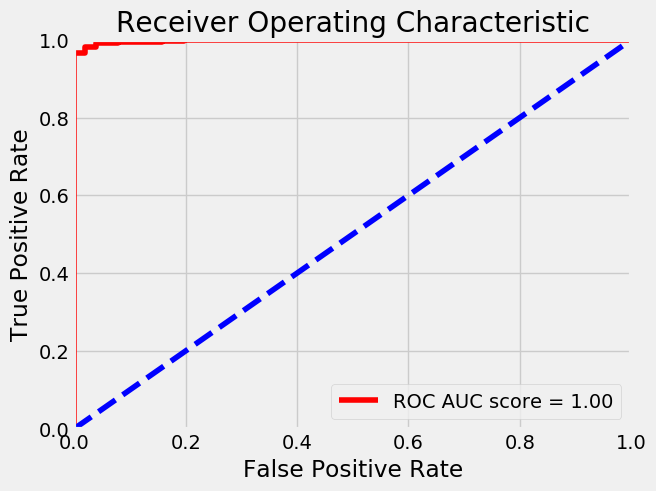

In [48]:
# calcular el FPR y el TPR para todos los umbrales de la clasificación
probs = xgb.predict_proba(X_test)
# Probabilidades positivas
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Importancia de las características con ganancia media')

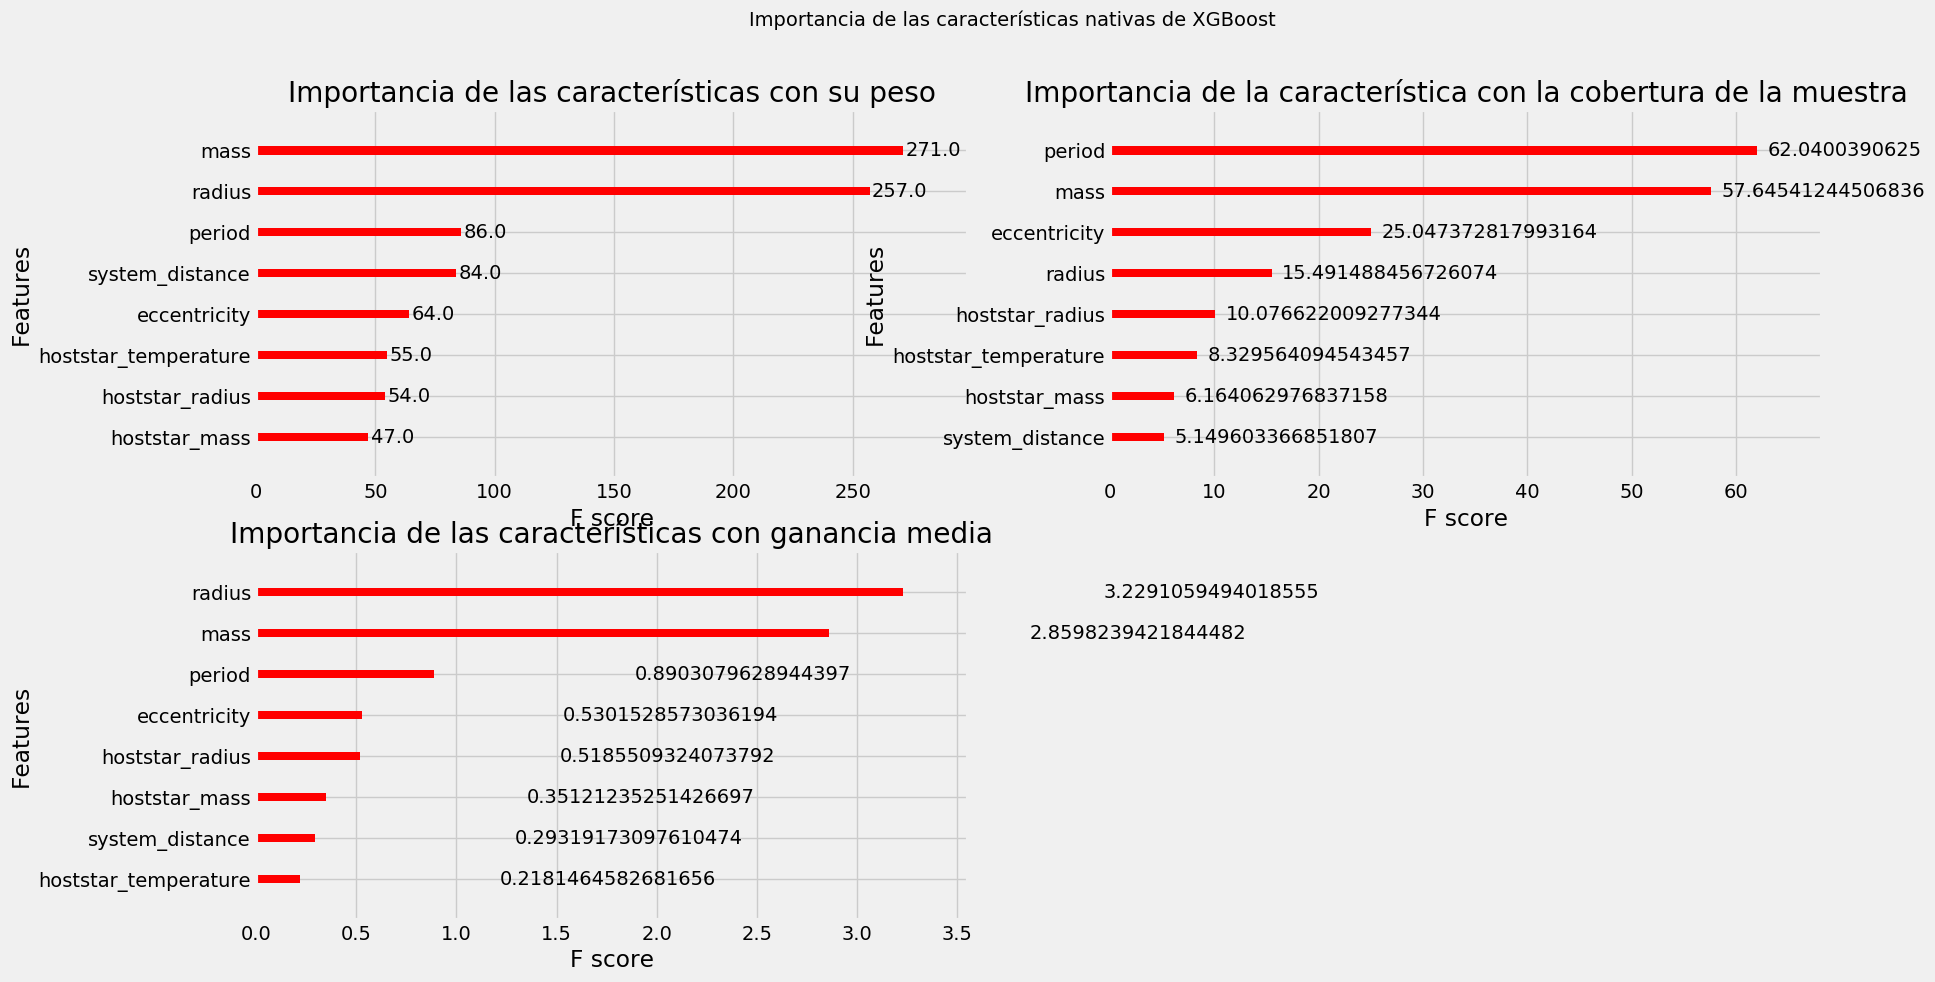

In [49]:
features = cols.columns.to_list()
xgb.get_booster().feature_names=features
# Trazando la importancia de las características de XGBoost
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso")

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra")

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media")

## ELI5

In [50]:
import eli5
from eli5.sklearn import PermutationImportance

In [52]:
eli5.show_weights(xgb.get_booster())

### Flujo de trabajo : Objeto de interpretación > Modelo en memoria > Interpretación

In [53]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [54]:
interpreter = Interpretation(training_data=X_test, feature_names=features)
im_model = InMemoryModel(xgb.predict_proba, examples=X_train, target_names=['Planeta Grande', 'Planeta Ligero'])

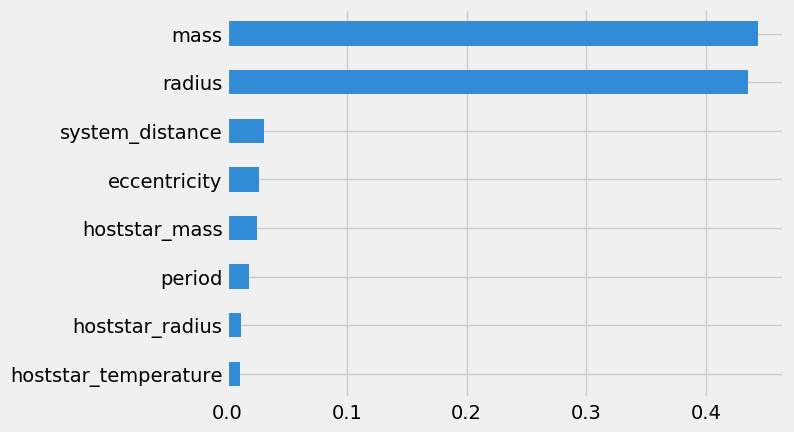

In [55]:
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=False, progressbar=False)

### Gráficos de dependencia parcial con SKATER

[38/38] grid cells ████████████████████ Time elapsed: 4 seconds

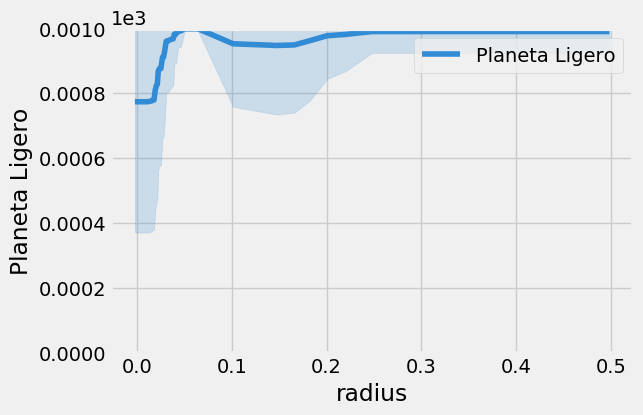

In [56]:
r = interpreter.partial_dependence.plot_partial_dependence(['radius'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

[27/27] grid cells ████████████████████ Time elapsed: 4 seconds

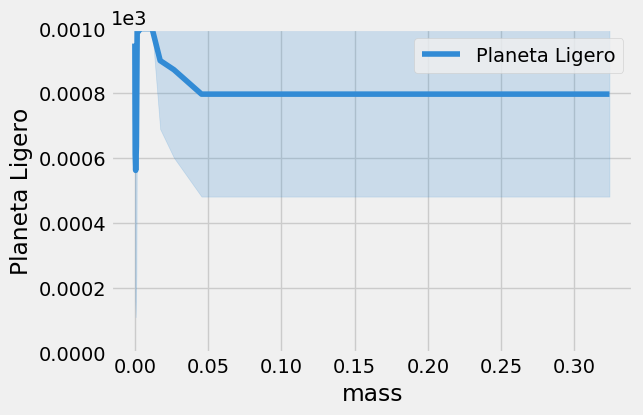

In [57]:
r = interpreter.partial_dependence.plot_partial_dependence(['mass'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

### Gráfico PD bivariante que muestra las interacciones entre las características "radius" y "mass" y su efecto en "Densidad".

[4004/4004] grid cells ████████████████████ Time elapsed: 17 seconds

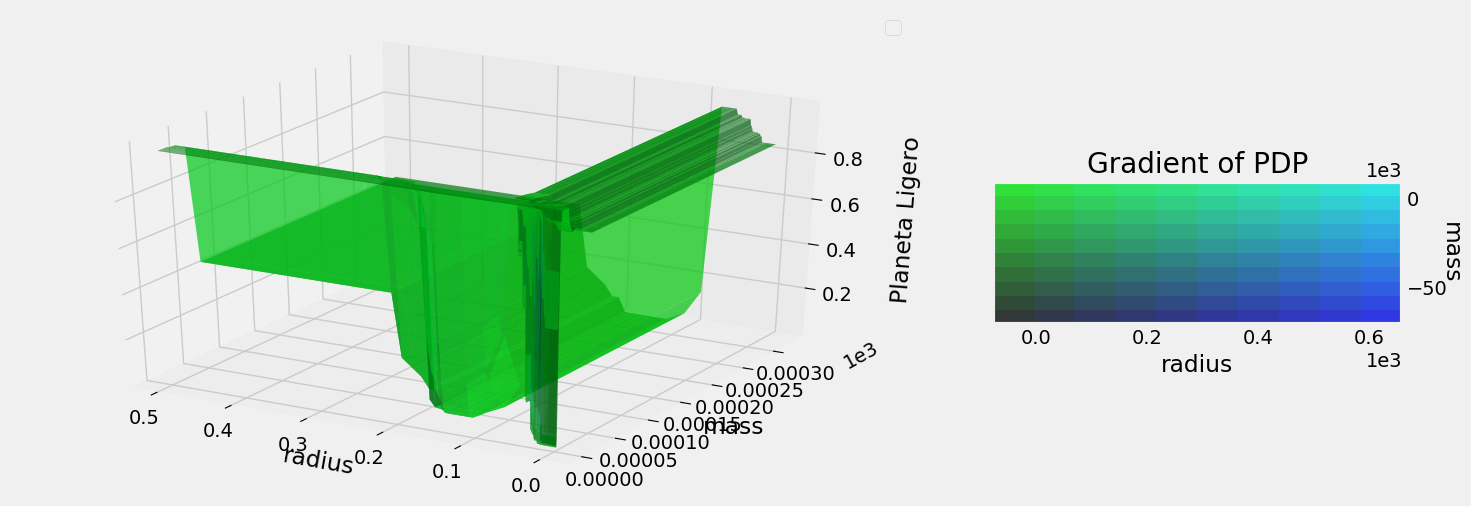

In [58]:

plots_list = interpreter.partial_dependence.plot_partial_dependence([('radius', 'mass')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=1000,
                                                                    figsize=(16, 6),
                                                                    grid_resolution=100,
                                                                    progressbar=True,
                                                                    n_jobs=-1)

## predicciones con SHAP


In [59]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [60]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [61]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()


0         1         2         3         4         5         6  \
1280  2.832854  3.270090 -0.308798  0.251189 -0.026137 -0.296997 -0.187624   
1281 -1.379060  4.175652  0.069056  0.349758  0.049510  0.354054 -0.237686   
1282 -2.717296  5.753527  0.009033  0.271696  0.499013 -0.468112  0.602836   
1283  2.992854  1.110446  0.175865  0.271736  0.108847  0.388247 -0.405427   
1284  4.359044 -1.496783  0.083593  0.212244  0.363412  0.654188 -0.111661   

             7  
1280  0.173608  
1281 -0.163025  
1282  0.342853  
1283  0.185799  
1284  0.266602

In [62]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  4.81215


In [63]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [64]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

## Predicciones del modelo con Skater usando LIME

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)


In [66]:
predictions = xgb.predict_proba(X_test.values)
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=features, discretize_continuous=True, class_names=['Planeta Grande', 'Planeta Ligero'])

In [67]:
#Buscamos una fila para comprobar el resultado
f_planeta = 1
y_test.iloc[f_planeta]

1

In [68]:
print('Reference:', y_test.iloc[f_planeta])
print('Predicted:', predictions[f_planeta])
exp.explain_instance(X_test.iloc[f_planeta].values, xgb.predict_proba).show_in_notebook()

Reference: 1
Predicted: [0.9905466 0.0094534]


In [69]:
#Buscamos una fila para comprobar el resultado
f_planeta = 4
y_test.iloc[f_planeta]

1

In [70]:
print('Reference:', y_test.iloc[f_planeta])
print('Predicted:', predictions[f_planeta])
exp.explain_instance(X_test.iloc[f_planeta].values, xgb.predict_proba).show_in_notebook()

Reference: 1
Predicted: [0.21160167 0.7883983 ]
